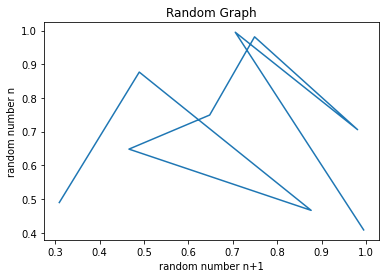

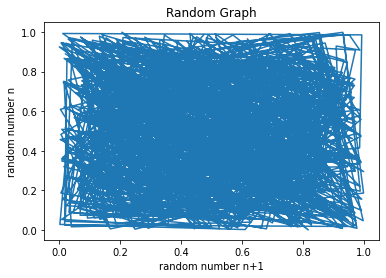

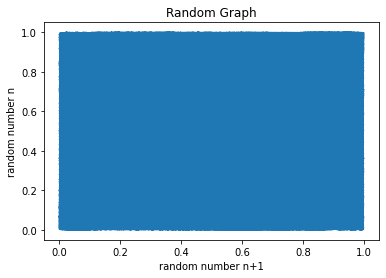

In [2]:
#Task: Generate 10, 1000 and 100,000 random numbers and make graphs of 𝑥𝑖 on the y-axis and 𝑥𝑖+1 on the x-axis.

#IMPORTS
import matplotlib.pyplot as plt  #import library
import numpy as np
import random
from copy import *

def randomsetgenerator(how_many_numbers_you_want_to_generate):

  #create a set of random numbers
  randomset=[]
  k=0
  while k<how_many_numbers_you_want_to_generate:
    randomset.append(random.random())
    k += 1

  #create lists for x and y values, where each x value in nth value from the original list and each y value is the nth+1 value from the original list
  x=deepcopy(randomset, memo=None, _nil=[])
  x.pop(0)
  y=deepcopy(randomset, memo=None, _nil=[])
  y.pop()

  #optional print statements to see lists explicitly written out
  #print("original set: ",randomset)
  #print("x axis: ", x)
  #print("y axis: ", y)

  #plot graph
  plt.plot(x, y) 
  plt.xlabel('random number n+1')  
  plt.ylabel('random number n') 
  plt.title('Random Graph') 
  plt.show() 

randomsetgenerator(10)
randomsetgenerator(1000)
randomsetgenerator(100000)

Assuming your graph looks reasonable, let’s proceed:- Radioactive decay is a good
starting place. 

Atoms have a characteristic half life – called 𝑡1/
2
– with the number of
atoms which remain at any given time t given by:
𝑁(𝑡) = 𝑁0 × 2
^
(𝑡/(
𝑡1/
2))


Probability for one atom decaying at any given time is
𝑝(𝑡) = 1 − 2
^(
𝑡
/(𝑡1/
2))


Task: divide your simulation into many time steps (much smaller than 𝑡1
/2
) and for
each atom in each time step, generate a random number, if random number is
bigger than p, then the atom decays.
Record the number of atoms which have decayed and the number remaining at the
end of each time step at the end of the simulation, plot this on a graph.


Run this simulation for 25, 250 and 5000 atoms and repeat it three times for each
number of atoms. What do you notice about the variation of each simulation for the
different numbers of atoms?

Number of atoms you start with:  25
Chosen half-life:  5  u
Experiment run for:  15  u
(time unit u is arbitrary)


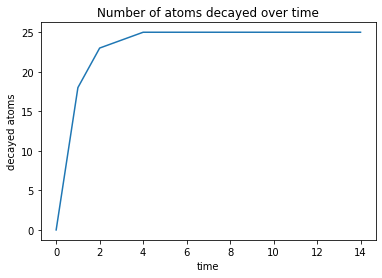

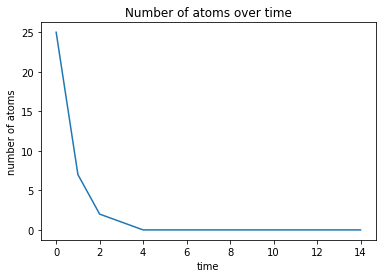

Number of atoms you start with:  250
Chosen half-life:  5  u
Experiment run for:  15  u
(time unit u is arbitrary)


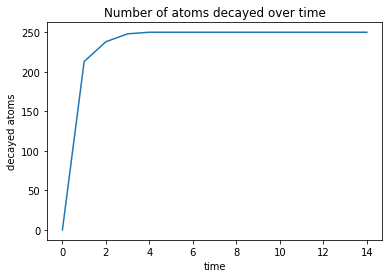

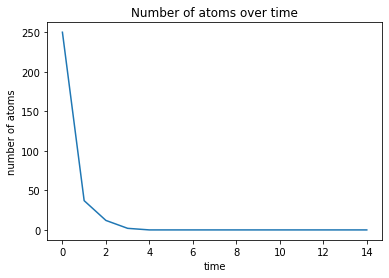

Number of atoms you start with:  5000
Chosen half-life:  5  u
Experiment run for:  15  u
(time unit u is arbitrary)


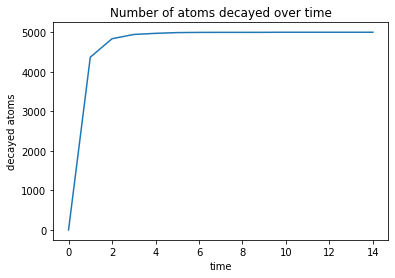

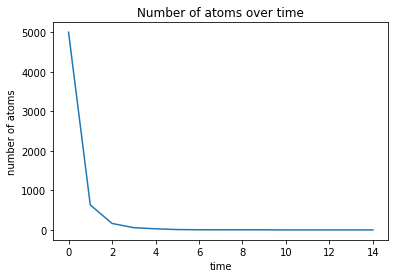

In [111]:
def radioactive_decay(how_many_atoms_you_start_with, how_long_you_let_experiment_run, half_life):

  #logistics
  print("Number of atoms you start with: ", how_many_atoms_you_start_with)
  print("Chosen half-life: ", half_life, " u")
  print("Experiment run for: ", how_long_you_let_experiment_run, " u")
  print("(time unit u is arbitrary)")

  #define x axis (time), which is a list
  time=np.arange(1, how_long_you_let_experiment_run, 1) 

  #create lists for decayed and non-decayed atoms (2 different y axis); now all at time=0
  decayed=[]
  survived=[1]*how_many_atoms_you_start_with
  n_of_atoms=len(survived)
 
  #create y1 (graph decay) and y2 (graph survive) for easy graph making later
  graph_decay=[0]
  graph_survive=[len(survived)]

  #find y1, y2 for different x (time value)
  for i in time:
    #assign a random value to each atom that still exists
    atomvalues=[]
    k=0
    while k<len(survived):
      atomvalues.append(random.random())
      k += 1
    #print("atomvalues: ", atomvalues)

    #define the probability of an atom decaying
    p=(1-(2**((0-i)/half_life)))
    #if value of the atom is bigger than the probabiliy of it decaying, let it decay, otherwise keep it as a survivor
    for j in atomvalues:
      if j>p:
        decayed.append(1)
        survived.pop(-1)
      else:
        pass
    #print("p: ", p)
    #after you went through the values of all the existing atoms and changed the number of elements in decayed and survived lists accordingly, it is now time to
    #update the length of survived and decayed (y1, y2) and plot them against time and
    #update the number of atoms
    
    graph_decay.append(len(decayed))
    graph_survive.append(len(survived))
    n_of_atoms=len(survived)

      #plot graph
  x=np.arange(0, how_long_you_let_experiment_run, 1)

  plt.plot(x, graph_decay) 
  plt.xlabel('time')  
  plt.ylabel('decayed atoms') 
  plt.title('Number of atoms decayed over time') 
  plt.show() 

      #plot graph
  plt.plot(x, graph_survive) 
  plt.xlabel('time')  
  plt.ylabel('number of atoms') 
  plt.title('Number of atoms over time') 
  plt.show() 


#running simulations

radioactive_decay(25, 15, 5)
#radioactive_decay(25, 300, 50)
#radioactive_decay(25, 300, 50)
radioactive_decay(250, 15, 5)
#radioactive_decay(250, 300, 50)
#radioactive_decay(250, 300, 50)
radioactive_decay(5000, 15, 5)
#radioactive_decay(5000, 300, 50)
#radioactive_decay(5000, 300, 50)